# Machine Learning Task 

## Predict Whether a Customer Makes a booking or not 

- Train a machine learning model to be able to predict the target outcome, which is a customer making a booking. 

- For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

### Importing the required libraries and modules

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import sklearn


### Data Ingestion 

In [2]:
df = pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### Exploratory Data Analysis 

In this section we'll be performing following analysis -
- Univariate 
- Bivariate
- Multivariate  

#### Data Restructuring 


In [6]:
# let's rename the columns for better understanding 
df.rename(columns={"purchase_lead":"day_diff_lead"},inplace=True)

##### Univariate Analysis

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [8]:
import plotly.express as px

In [16]:
#Let's visualize the booking_Completed column 

# first creating a new database from the values 

booking = pd.value_counts(df['booking_complete'], sort=True)
booking 

C:\Users\singh\AppData\Local\Temp\ipykernel_15096\2546780183.py:5: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [ ]:
# let's visualize the distribution of Booking made or not using count plot in plot

count_classes = pd.value_counts(df['booking_complete'], sort=True)
fig = px.bar (count_classes,
                   x=count_classes.index,
                   y= count_classes.values,
                   title="Number of Booking Completed Vs Not", 
                   )
fig.update_layout(xaxis_title="Booking Complete", yaxis_title="Count",
                  xaxis = dict(tickvals = [0,1], ticktext = ['Not-Completed', 'Completed']),)
fig.show()

In [18]:
# Let's now visualize the distribution 

fig = px.bar(booking, x= booking.index, y= booking.values, title="Number of Booking Completed Vs Not")

# updating the figure lables 
fig.update_layout(xaxis_title="Booking Complete", yaxis_title="Count",
                  xaxis = dict(tickvals = [0,1], ticktext = ['Not-Completed', 'Completed']),)
fig.show()

- The above bar graph shows that we have **83.78 %**  of the booking not getting completed which is very high percentage 
- In number we are only able to book around **7400** out of total **50000** numbers of tickets.
- This also represents that our dataset is highly imbalanced.

In [9]:
# let's visualize the distribution of number of passengers the data using plotly
fig = px.histogram(df,
                   x="num_passengers",
                   title="Number of passengers Travelling on British Airways",
                   color="num_passengers",)

fig

- It is clear from the graph the most number of passengers are booking for their own. 
- We have around **13K** rows of data with 2 passengers tickets being booked.

In [38]:
# let's create a chloropath map to visualize the distribution of frequency of booking origin 

import plotly.express as px

# Count the frequency of booking origins
booking_origin_counts = df['booking_origin'].value_counts().reset_index()
booking_origin_counts.columns = ['booking_origin', 'frequency']

# Create a choropleth map using built-in country data
fig = px.choropleth(booking_origin_counts, 
                    locations='booking_origin', 
                    locationmode='country names',  # Use country names
                    color='frequency', 
                    color_continuous_scale='RdBu',
                    projection='orthographic',
                    title='Frequency of Booking Origin (No GeoJSON)')

# Add text labels for the country counts
fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_traces(text=booking_origin_counts['frequency'], showlegend=False)

fig.show()


- We received almost **35%** of tickets from **Austrailia** only.
- Post Australia we have Malaysia, South Korean , China and Japan and other Asian countries.
- There are also few values for the tickets that do not have any orgin which account to 78 in numbers. 

##### Bivariate Analysis

In [42]:
df.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [48]:

# Assuming your dataset is loaded into a DataFrame named 'df'

# Count the number of bookings for each combination of 'trip_type' and 'booking_origin'
counts = df.groupby(['trip_type', 'booking_origin'])['booking_complete'].count().reset_index()

# Create a bar chart
fig = px.bar(counts, x="trip_type", y="booking_complete", color="booking_origin",
             title="Booking Completion by Trip Type and Origin",
             labels={'trip_type': 'Trip Type', 'booking_complete': 'Booking Count'})

fig.show()



- It is very clear that **99%** of the tickets are booked for the RoundTrips.
- Circle Trips and one way trip are very rarely booked.


In [53]:

# Group the data by 'flight_day' and calculate the total number of bookings for each day
daily_booking_counts = df.groupby('flight_day')['booking_complete'].sum().reset_index()

# Create a bar chart
fig = px.bar(daily_booking_counts, x="flight_day", y="booking_complete", 
             title="Total Number of Bookings by Day",
             labels={'flight_day': 'Day', 'booking_complete': 'Total Bookings'})

fig.show()


- We have a maximum Booking confirmation on **Wednesday , Monday and Friday.**


##### Multivariate Analysis

d:\Projects and Work\Projects\Personal Projects\British Airways ML task dataset\virt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Projects and Work\Projects\Personal Projects\British Airways ML task dataset\virt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Projects and Work\Projects\Personal Projects\British Airways ML task dataset\virt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Projects and Work\Projects\Personal Projects\British Airways ML task dataset\virt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will b

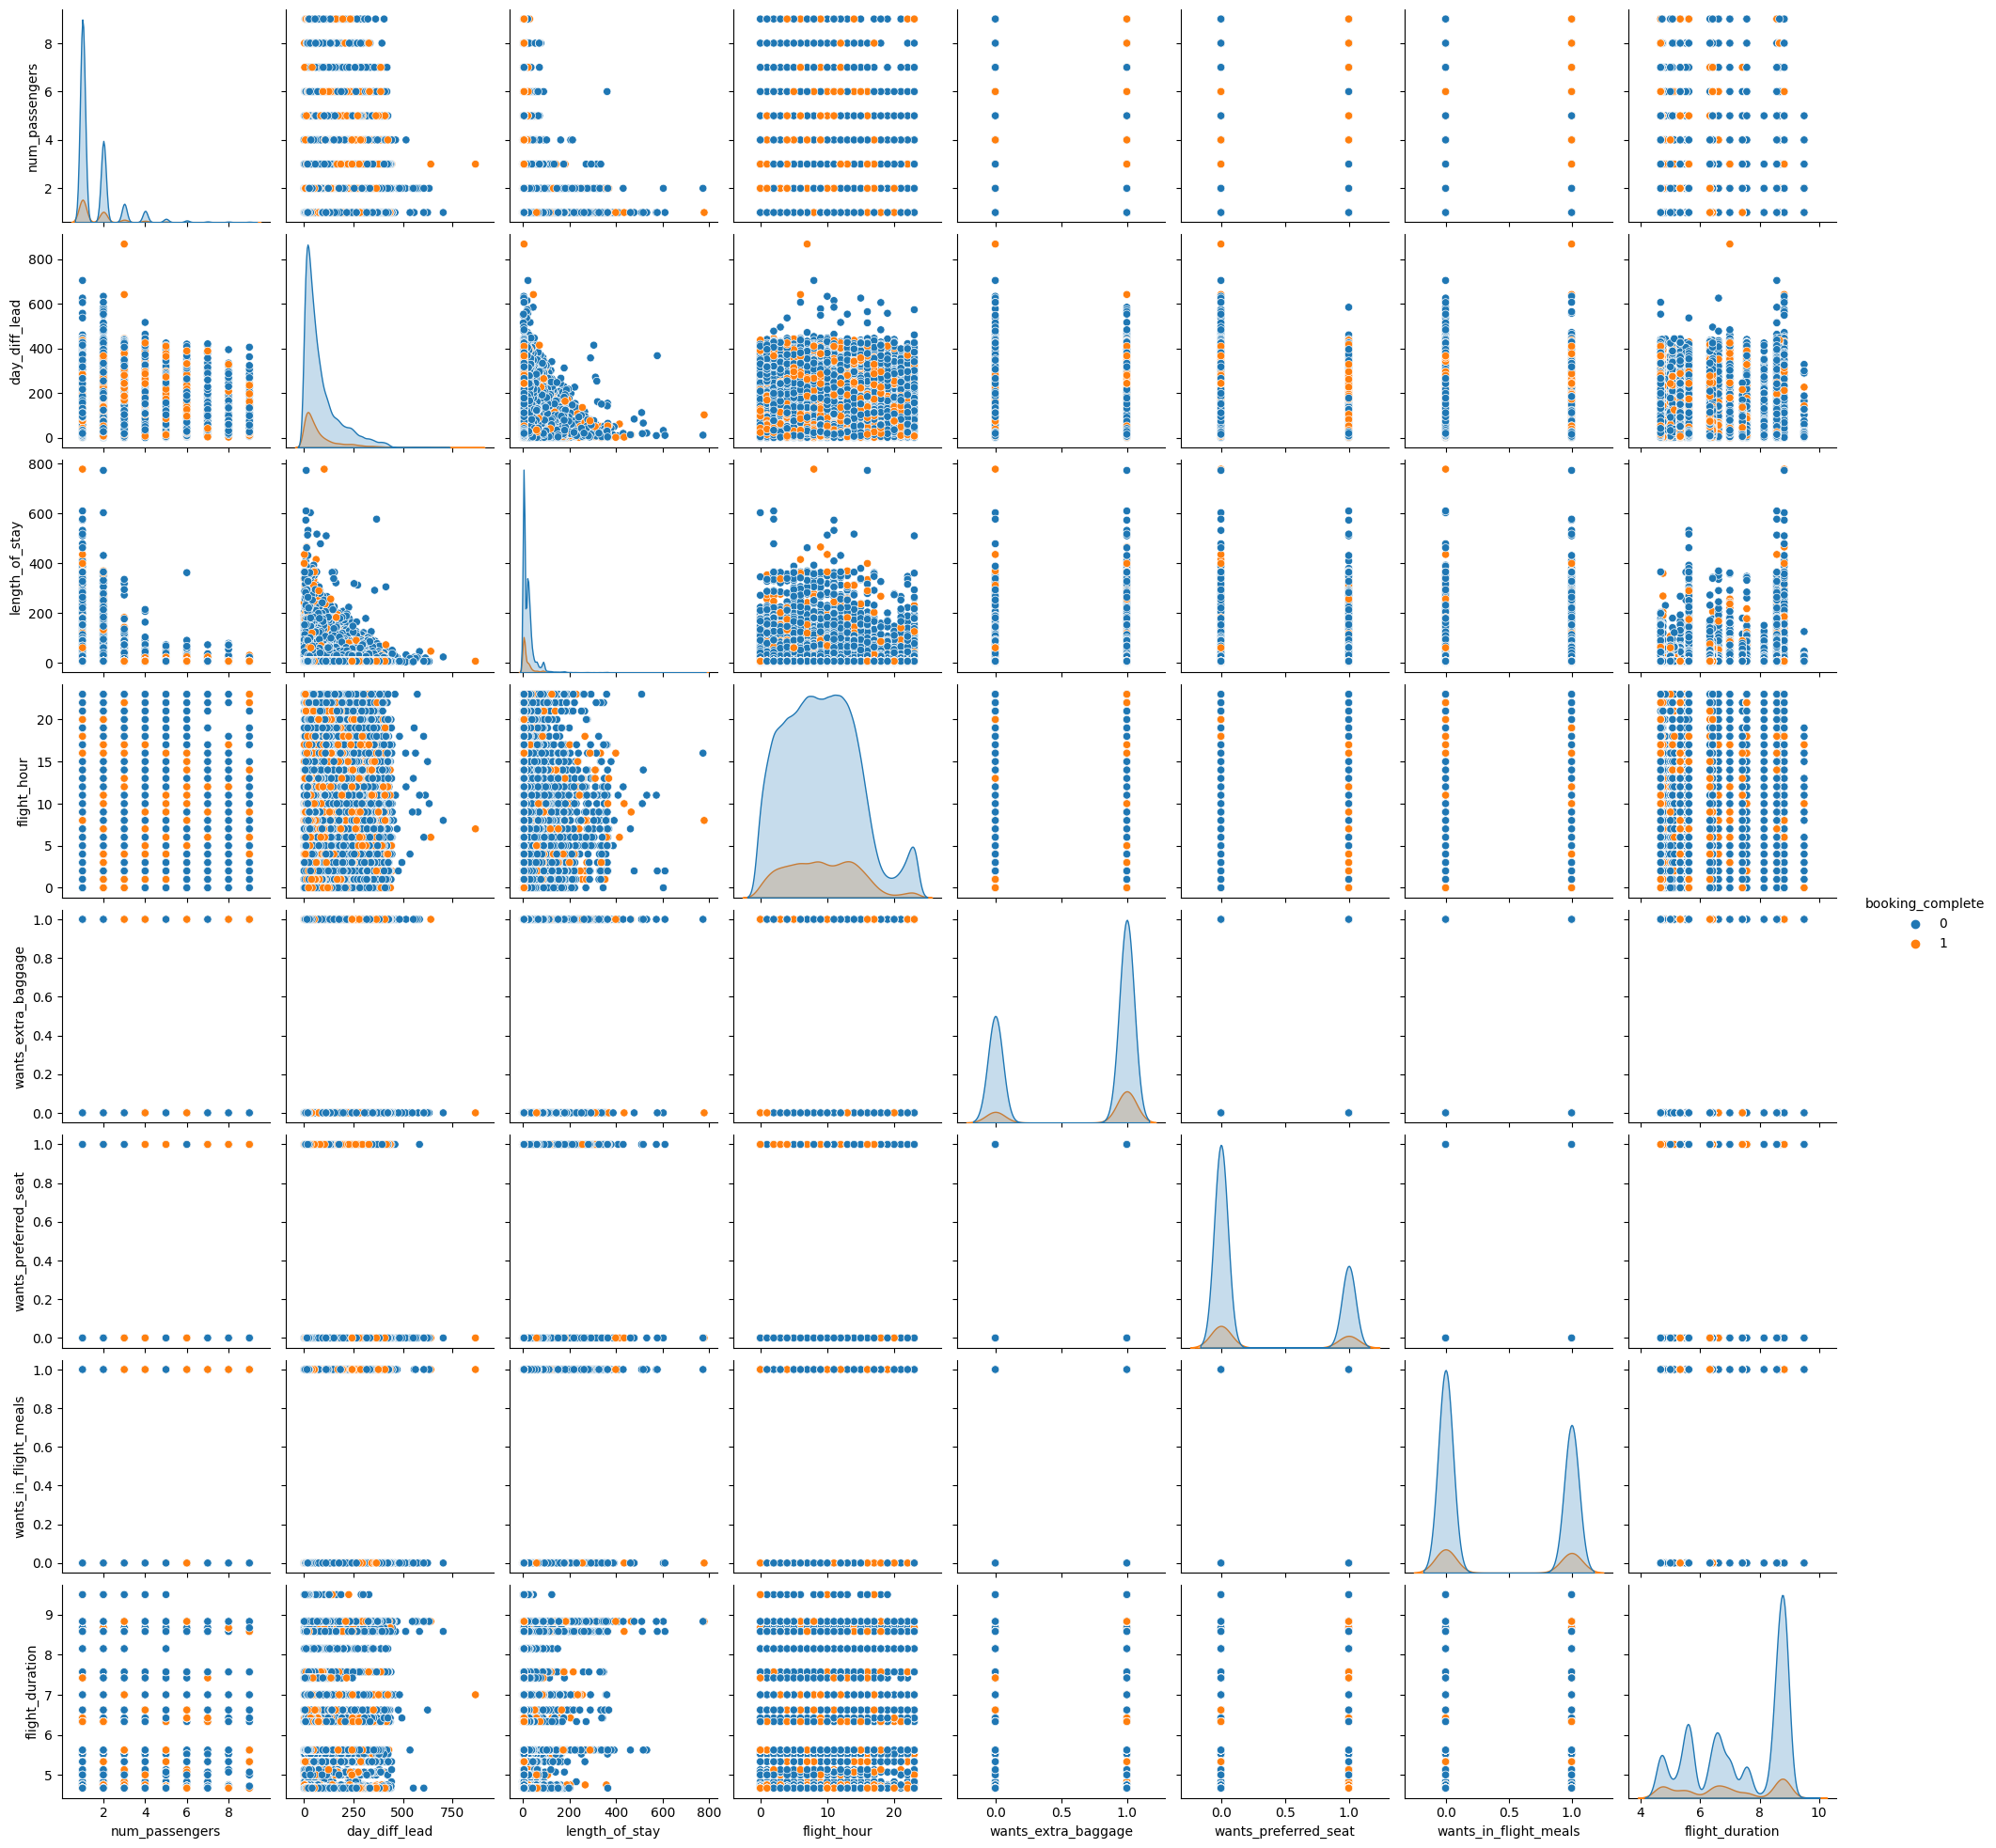

In [41]:
## Let's create pairplot for the dataset to check the correlation between the features using plotly 
sns.pairplot(df, hue="booking_complete", diag_kind="kde")

### Data Pre-Processing

#### Duplicate and Missing Values 

In [54]:
# duplicate values 
df.duplicated().value_counts()

False    49281
True       719
Name: count, dtype: int64

**Since duplicate values will be increase the bias of the model thus removing the duplicated values.**

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
# duplicate values 
df.duplicated().value_counts()

False    49281
Name: count, dtype: int64

Let's check the missing values in the dataset 

In [57]:
# missing values in the dataframe 
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
day_diff_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

- From above it is clear there is no missing values however while checking the dataset it was found that there are few values ing the booking_origin which are **(not set)**, which is incorrect.


In [58]:
# Let's check the unique values in the booking_origin column 
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [59]:
# Now let's try to count the values with not Set values in booking_origin column 
(df['booking_origin'] == '(not set)').value_counts()

booking_origin
False    49203
True        78
Name: count, dtype: int64

- So we have total of **78** values that are **not set** for the booking_origin feature.
- We can either remove those values or we can impute them for further analysis.

##### Dropping all the data points that has "not set"


In [60]:
# creating new data frame while dropping the not set values from booking_origin column
DF= df[df['booking_origin'] != '(not set)']

In [61]:
DF.shape

(49203, 14)

#### Feature Engineering

In [62]:
DF.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [63]:
# Let's create new features from the existing  features
DF["booking_origin_city"] = DF["route"].str[:3]
DF["destination_city"] = DF["route"].str[3:]

C:\Users\singh\AppData\Local\Temp\ipykernel_15096\483995869.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\singh\AppData\Local\Temp\ipykernel_15096\483995869.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
DF.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_city,destination_city
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [65]:
DF.route.unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [123]:
# Let's drop the route column from the dataset 
DF=DF.drop("route", axis=1)

In [124]:
# Let's load the IATA Codes from the internet 
import json

#loading Json data 

with open('IATA_Codes.txt','r') as f:
    data = json.load(f)

In [125]:
# Let's now create a dictionary mapping the IATA codes to the location 
iata_to_country ={entry['Code']:entry['Country'] for entry in data }

In [126]:
iata_to_country

{'AAR': 'Denmark',
 'ABD': 'Iran',
 'AEH': 'Chad',
 'ABZ': 'United Kingdom',
 'ABR': 'USA',
 'ABJ': "Cote d'Ivoire",
 'ABI': 'USA',
 'AUH': 'United Arab Emirates',
 'ABV': 'Nigeria',
 'AUE': 'Egypt',
 'ABS': 'Egypt',
 'ACA': 'Mexico',
 'ACC': 'Ghana',
 'ADA': 'Turkey',
 'ADD': 'Ethiopia',
 'ADL': 'Australia',
 'ADE': 'Yemen',
 'ADF': 'Turkey',
 'AER': 'Russia',
 'AJY': 'Niger',
 'AGA': 'Morocco',
 'SUM': 'Guam',
 'AGZ': 'South Africa',
 'BQN': 'Puerto Rico',
 'AGU': 'Mexico',
 'AMD': 'India',
 'AYU': 'Papua New Guinea',
 'AJA': 'France',
 'AXT': 'Japan',
 'CAK': 'USA',
 'AKT': 'Cyprus',
 'AAN': 'United Arab Emirates',
 'AAC': 'Egypt',
 'ALH': 'Australia',
 'ABY': 'USA',
 'ALB': 'USA',
 'LBI': 'France',
 'AAL': 'Denmark',
 'ABQ': 'USA',
 'ABX': 'Australia',
 'ACI': 'Channel Islands',
 'ALP': 'Syria',
 'AES': 'Norway',
 'ALJ': 'South Africa',
 'HBH': 'Egypt',
 'ALY': 'Egypt',
 'ESF': 'USA (LA)',
 'FJR': 'United Arab Emirates',
 'AHO': 'Italy',
 'ALG': 'Algeria',
 'AHU': 'Morocco',
 'ALC'

In [127]:
# creating a helper function to classify flight as domestic or international 
def classify_flight(iata_code):
    country = iata_to_country.get(iata_code, "unknown")

    if country == "India":
        return "domestic"
    else:
        return "international"

In [128]:
DF.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_city,destination_city,flight_type
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL,international
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL,international
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL,international
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL,international
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,AKL,DEL,international


In [129]:
# Applying the function to create a new column 
DF["flight_type"] = DF["booking_origin_city"].apply(classify_flight)

In [130]:
DF.head()

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_city,destination_city,flight_type
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0,AKL,DEL,international
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0,AKL,DEL,international
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0,AKL,DEL,international
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0,AKL,DEL,international
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0,AKL,DEL,international


#### Feature Scaling 

In [131]:
# importing the standard Scaler library 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [132]:
# splitting the dataset into dependent and independent columns 
X = DF.drop("booking_complete", axis=1)
y = DF["booking_complete"]


In [133]:
# splitting the categorical and numerical columns 
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [134]:
# Scaling the categorical categorical columns 
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

In [135]:
X

,num_passengers,sales_channel,trip_type,day_diff_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_origin_city,destination_city,flight_type
0,2,0,2,262,19,7,2,60,1,0,0,5.52,0,4,1
1,1,0,2,112,20,3,2,60,0,0,0,5.52,0,4,1
2,2,0,2,243,22,17,6,35,1,1,0,5.52,0,4,1
3,1,0,2,96,31,4,2,60,0,0,1,5.52,0,4,1
4,2,0,2,68,22,15,6,35,1,0,1,5.52,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,2,3,1,0,1,5.62,66,40,1
49996,1,0,2,111,6,4,3,3,0,0,0,5.62,66,40,1
49997,1,0,2,24,6,22,2,3,0,0,1,5.62,66,40,1
49998,1,0,2,15,6,11,1,3,1,0,1,5.62,66,40,1


In [136]:
# Split the dataset into training and testing sets (you can customize the split ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Handling Imbalanced Dataset 

In [137]:

# Instantiate the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [138]:
# again split the dataset into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [139]:
# Let's now scale the numerical columns
scaler = StandardScaler()
X_train_resampled= scaler.fit_transform(X_train_resampled)
X_test_resampled= scaler.transform(X_test_resampled)

In [140]:
X_train_resampled

array([[ 0.53326551,  3.7025534 ,  0.0897035 , ..., -0.0474598 ,
         0.84484559,  0.30045461],
       [ 1.61583201, -0.27008388,  0.0897035 , ...,  0.1937356 ,
        -0.39804015,  0.30045461],
       [-0.54930099, -0.27008388,  0.0897035 , ..., -0.48161151,
         0.15435351, -3.32828973],
       ...,
       [ 0.53326551, -0.27008388,  0.0897035 , ..., -1.49463218,
        -1.70997509,  0.30045461],
       [-0.54930099, -0.27008388,  0.0897035 , ...,  0.57964824,
         1.32819004,  0.30045461],
       [-0.54930099, -0.27008388,  0.0897035 , ...,  1.11027811,
         0.15435351,  0.30045461]])

In [141]:
X_test_resampled

array([[ 0.53326551, -0.27008388,  0.0897035 , ..., -0.86752415,
         1.12104242, -3.32828973],
       [ 0.53326551, -0.27008388,  0.0897035 , ...,  1.01379995,
         0.77579638,  0.30045461],
       [-0.54930099, -0.27008388,  0.0897035 , ...,  0.96556087,
         0.0162551 ,  0.30045461],
       ...,
       [-0.54930099, -0.27008388,  0.0897035 , ..., -1.6875885 ,
        -0.95043381,  0.30045461],
       [ 4.8635315 , -0.27008388,  0.0897035 , ..., -0.67456783,
         1.25914083,  0.30045461],
       [-0.54930099, -0.27008388,  0.0897035 , ...,  1.44795167,
         0.43055034,  0.30045461]])

### Model Training 

In [142]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
model.coef_
# prediction 
y_pred = model.predict(X_test_resampled)

In [143]:
# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.66


In [144]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5368 3459]
 [2546 6190]]


In [145]:
# Display classification report
class_report = classification_report(y_test_resampled, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      8827
           1       0.64      0.71      0.67      8736

    accuracy                           0.66     17563
   macro avg       0.66      0.66      0.66     17563
weighted avg       0.66      0.66      0.66     17563



In [146]:
model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2)
model.fit(X_train_resampled, y_train_resampled)
y_pred= model.predict(X_test_resampled)

In [147]:
# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [148]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5259 3568]
 [1709 7027]]


In [149]:
# Display classification report
class_report = classification_report(y_test_resampled, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      8827
           1       0.66      0.80      0.73      8736

    accuracy                           0.70     17563
   macro avg       0.71      0.70      0.70     17563
weighted avg       0.71      0.70      0.70     17563



In [150]:
# Initialize and train the AdaBoostClassifier
base_model = DecisionTreeClassifier()  # Use a simple base classifier
model = AdaBoostClassifier(base_model)  # You can adjust n_estimators
model.fit(X_train_resampled, y_train_resampled)
y_pred= model.predict(X_test_resampled)

In [152]:
# Calculate accuracy
accuracy = accuracy_score(y_test_resampled, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [157]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7014 1813]
 [1491 7245]]


In [156]:
# Display classification report
class_report = classification_report(y_test_resampled, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      8827
           1       0.80      0.83      0.81      8736

    accuracy                           0.81     17563
   macro avg       0.81      0.81      0.81     17563
weighted avg       0.81      0.81      0.81     17563

